In [1]:
from peptides.classicalNeuralNetwork import Classical_NeuralNetwork
from peptides.quantumNeuralNetwork import Quantum_NeuralNetwork
from peptides.dataLoader import dataLoader

# Load and format data

In [2]:
dl = dataLoader()
X_pca, y = dl.load_data(allele = 'HLA-A*03:01',
                        PCA_dim = 3,
                        size_dataset = 100)

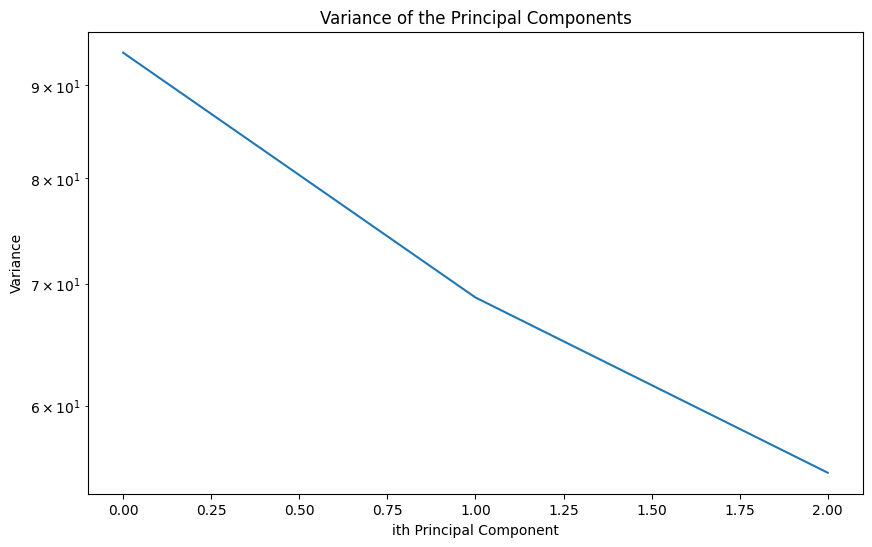

In [3]:
dl.plot_pca_variance()

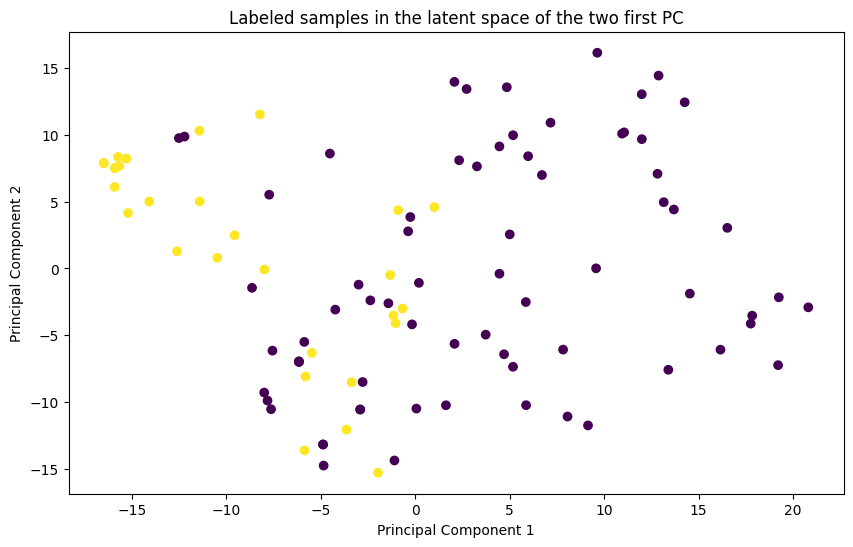

In [4]:
dl.plot_pca_2D()

# Train Classical 

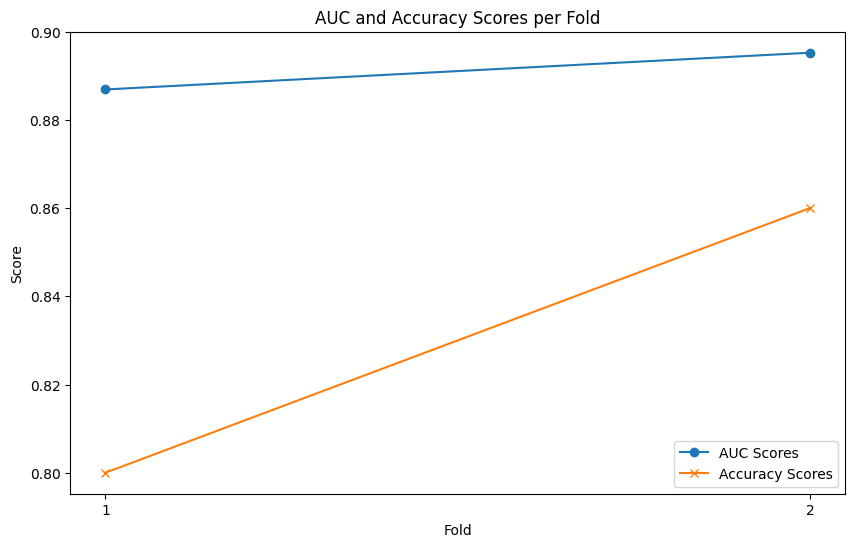

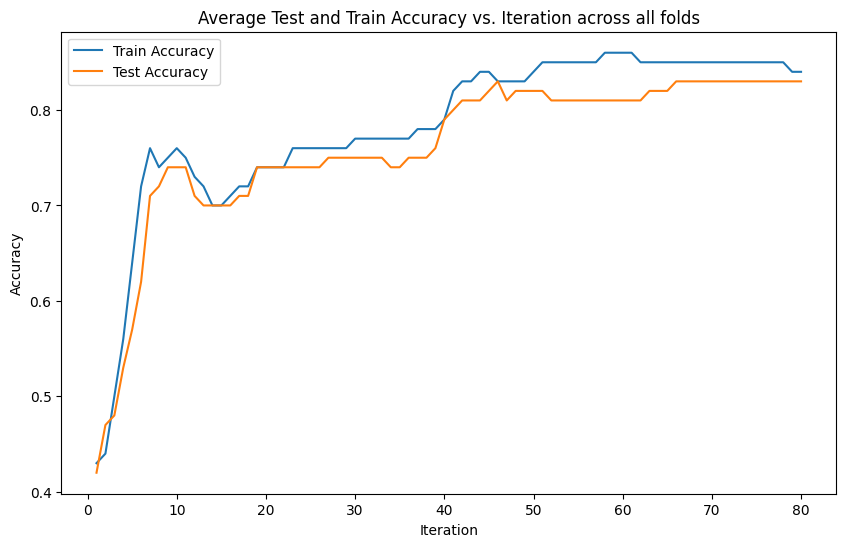

Average AUC: 0.8910714285714285
Average Accuracy: 0.8300000000000001


In [5]:
CNN = Classical_NeuralNetwork(X_pca, y)
CNN.train(n_splits = 2,
          n_iterations = 80,
          hidden_layer_sizes = 50)

# Train on qasm_simulator

In [6]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()

QNN = Quantum_NeuralNetwork(X_pca,y, simulator)
QNN.train(n_splits = 2,
            n_iterations = 50,
            num_features = 3,
            reps = 5)

Label 0 converted to [1 0]
Label 0 converted to [1 0]


# Train on simulation of ibm_quebec

In [ ]:
from qiskit_ibm_provider import IBMProvider
from qiskit_aer import AerSimulator

provider = IBMProvider(instance="pinq-quebec-hub/ecole-dhiver/qml-workshop")
quebec = provider.get_backend('ibm_quebec')
quebec_simulator = AerSimulator.from_backend(quebec)

QNN = Quantum_NeuralNetwork(X_pca,y, backend = quebec_simulator)
QNN.train(n_splits = 2,
            n_iterations = 50,
            num_features = 3,
            reps = 5)

RequestsApiError: '401 Client Error: Unauthorized for url: https://api.quantum.ibm.com/runtime/backends/?provider=pinq-quebec-hub%2Fecole-dhiver%2Fqml-workshop. {"errors":[{"code":1201,"message":"Invalid credentials.","solution":"Verify your credentials and try again.","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"cn1b0f0h21vgtqrhuq50"}'

# Train on ibm_Quebec

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance="pinq-quebec-hub/ecole-dhiver/qml-workshop")
simulator = provider.get_backend('ibm_quebec')

#QNN = Quantum_NeuralNetwork(X_pca,y, simulator)
#QNN.train(n_splits = 2,
#            n_iterations = 50,
#            num_features = 3,
#            reps = 5)